In [1]:
# PROBLEM 2

import numpy as np
import pandas as pd
%matplotlib inline

# Download cereal dataset from Kaggle
#os.system('wget https://www.kaggle.com/datasets/crawford/80-cereals/download -O cereal.csv')
# TODO Bug, may require prior user authentication 

cereal_df = pd.read_csv('cereal.csv')

# Data cleaning
cereal_df = cereal_df.drop([57]) # Oatmeal ain't cereal!
cereal_df = cereal_df.drop([20])# Cream of Wheat ain't cereal!

# Not important features for selection
cereal_df = cereal_df.drop(columns='shelf')
cereal_df = cereal_df.drop(columns='potass')
cereal_df = cereal_df.drop(columns='mfr')
cereal_df = cereal_df.drop(columns='type')
cereal_df = cereal_df.drop(columns='weight')

In [2]:
cereal_df
# Aren't there supposed to be 80 cereals here? (77 unique values)

,name,calories,protein,fat,sodium,fiber,carbo,sugars,vitamins,cups,rating
0,100% Bran,70,4,1,130,10.0,5.0,6,25,0.33,68.402973
1,100% Natural Bran,120,3,5,15,2.0,8.0,8,0,1.00,33.983679
2,All-Bran,70,4,1,260,9.0,7.0,5,25,0.33,59.425505
3,All-Bran with Extra Fiber,50,4,0,140,14.0,8.0,0,25,0.50,93.704912
4,Almond Delight,110,2,2,200,1.0,14.0,8,25,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,110,2,1,250,0.0,21.0,3,25,0.75,39.106174
73,Trix,110,1,1,140,0.0,13.0,12,25,1.00,27.753301
74,Wheat Chex,100,3,1,230,3.0,17.0,3,25,0.67,49.787445
75,Wheaties,100,3,1,200,3.0,17.0,3,25,1.00,51.592193


# Recomendation 9: Pay attention to portion size...

,name,calories,protein,fat,sodium,fiber,carbo,sugars,vitamins,cups,rating
40,Kix,110,2,1,260,0.0,21.0,3,25,1.50,39.241114
37,Honey-comb,110,1,0,180,0.0,14.0,11,25,1.33,28.742414
11,Cheerios,110,6,2,290,2.0,17.0,1,25,1.25,50.764999
61,Rice Chex,110,1,0,240,0.0,23.0,2,25,1.13,41.998933
53,Product 19,100,3,0,320,1.0,20.0,3,100,1.00,41.503540
...,...,...,...,...,...,...,...,...,...,...,...
51,Oatmeal Raisin Crisp,130,3,2,170,1.5,13.5,10,25,0.50,30.450843
34,Great Grains Pecan,120,3,3,75,3.0,13.0,4,25,0.33,45.811716
2,All-Bran,70,4,1,260,9.0,7.0,5,25,0.33,59.425505
0,100% Bran,70,4,1,130,10.0,5.0,6,25,0.33,68.402973


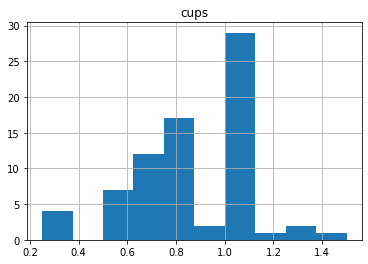

In [3]:
ax = cereal_df.hist(column='cups')
cereal_df.sort_values('cups', ascending=False)

In [4]:
# Assumption: if portion size is significantly different than the mode cereal, 
# portion size and resulting nutrition are harder to manage for pre-coffee humans

cereal_df = cereal_df.drop([40,37,11,61]) # Drop jumbo portion size outliers
cereal_df = cereal_df.drop([33,0,2,34]) # Drop tiny portion size outliers
cereal_df.sort_values('cups', ascending=False)

,name,calories,protein,fat,sodium,fiber,carbo,sugars,vitamins,cups,rating
1,100% Natural Bran,120,3,5,15,2.0,8.0,8,0,1.0,33.983679
18,Count Chocula,110,1,1,180,0.0,12.0,13,25,1.0,22.396513
44,Muesli Raisins; Dates; & Almonds,150,4,3,95,3.0,16.0,11,25,1.0,37.136863
45,Muesli Raisins; Peaches; & Pecans,150,4,3,150,3.0,16.0,11,25,1.0,34.139765
38,Just Right Crunchy Nuggets,110,2,1,170,1.0,17.0,6,100,1.0,36.523683
...,...,...,...,...,...,...,...,...,...,...,...
19,Cracklin' Oat Bran,110,3,3,140,4.0,10.0,7,25,0.5,40.448772
59,Raisin Nut Bran,100,3,2,140,2.5,10.5,8,25,0.5,39.703400
56,Quaker Oat Squares,100,4,1,135,2.0,14.0,6,25,0.5,49.511874
51,Oatmeal Raisin Crisp,130,3,2,170,1.5,13.5,10,25,0.5,30.450843


In [5]:
cereal_df = cereal_df.drop(columns='cups') # Clean up for screen space

# Recommendation 3: Limit sugar < 10% of calories (sorta)

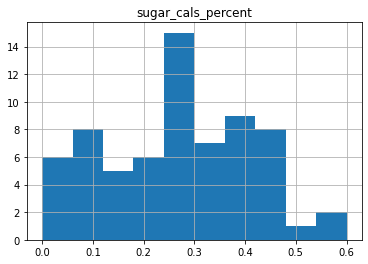

In [6]:
# 4 calories per gram of sugar
cereal_df['sugar_cals'] = cereal_df['sugars'] * 4
cereal_df['sugar_cals_percent'] = cereal_df['sugar_cals'] / cereal_df['calories']
ax = cereal_df.hist(column='sugar_cals_percent')

In [7]:
cereal_df = cereal_df[cereal_df['sugar_cals_percent'] < 0.325000] # Remove garbage
cereal_df.sort_values('sugar_cals_percent', ascending=False)

,name,calories,protein,fat,sodium,fiber,carbo,sugars,vitamins,rating,sugar_cals,sugar_cals_percent
59,Raisin Nut Bran,100,3,2,140,2.5,10.5,8,25,39.703400,32,0.320000
51,Oatmeal Raisin Crisp,130,3,2,170,1.5,13.5,10,25,30.450843,40,0.307692
48,Nut&Honey Crunch,120,2,1,190,0.0,15.0,9,25,29.924285,36,0.300000
12,Cinnamon Toast Crunch,120,1,3,210,0.0,13.0,9,25,19.823573,36,0.300000
45,Muesli Raisins; Peaches; & Pecans,150,4,3,150,3.0,16.0,11,25,34.139765,44,0.293333
44,Muesli Raisins; Dates; & Almonds,150,4,3,95,3.0,16.0,11,25,37.136863,44,0.293333
76,Wheaties Honey Gold,110,2,1,200,1.0,16.0,8,25,36.187559,32,0.290909
4,Almond Delight,110,2,2,200,1.0,14.0,8,25,34.384843,32,0.290909
26,Frosted Mini-Wheats,100,3,0,0,3.0,14.0,7,25,58.345141,28,0.280000
1,100% Natural Bran,120,3,5,15,2.0,8.0,8,0,33.983679,32,0.266667


In [8]:
cereal_df = cereal_df.drop(columns='sugar_cals_percent')

# Recommendation 3: Limit sat. fat < 10% of calories (sorta)

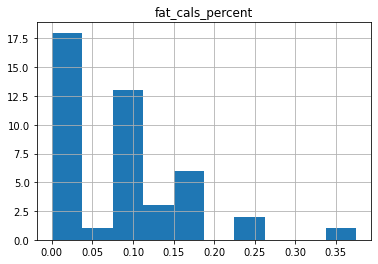

In [9]:
# 9 calories per gram of fat
cereal_df['fat_cals'] = cereal_df['fat'] * 9
cereal_df['fat_cals_percent'] = cereal_df['fat_cals'] / cereal_df['calories']
ax = cereal_df.hist(column='fat_cals_percent')

In [10]:
cereal_df = cereal_df.drop([1,19]) # Remove outliers
cereal_df.sort_values('fat_cals_percent', ascending=False)

,name,calories,protein,fat,sodium,fiber,carbo,sugars,vitamins,rating,sugar_cals,fat_cals,fat_cals_percent
12,Cinnamon Toast Crunch,120,1,3,210,0.0,13.0,9,25,19.823573,36,27,0.225000
45,Muesli Raisins; Peaches; & Pecans,150,4,3,150,3.0,16.0,11,25,34.139765,44,27,0.180000
44,Muesli Raisins; Dates; & Almonds,150,4,3,95,3.0,16.0,11,25,37.136863,44,27,0.180000
41,Life,100,4,2,150,2.0,12.0,6,25,45.328074,24,18,0.180000
59,Raisin Nut Bran,100,3,2,140,2.5,10.5,8,25,39.703400,32,18,0.180000
13,Clusters,110,3,2,140,2.0,13.0,7,25,40.400208,28,18,0.163636
4,Almond Delight,110,2,2,200,1.0,14.0,8,25,34.384843,32,18,0.163636
7,Basic 4,130,3,2,210,2.0,18.0,8,25,37.038562,32,18,0.138462
51,Oatmeal Raisin Crisp,130,3,2,170,1.5,13.5,10,25,30.450843,40,18,0.138462
49,Nutri-Grain Almond-Raisin,140,3,2,220,3.0,21.0,7,25,40.692320,28,18,0.128571


In [11]:
cereal_df = cereal_df.drop(columns='fat_cals_percent') # Clean up for screen space

# Recommendation 3: Limit sodium

,name,calories,protein,fat,sodium,fiber,carbo,sugars,vitamins,rating,sugar_cals,fat_cals
74,Wheat Chex,100,3,1,230,3.0,17.0,3,25,49.787445,12,9
67,Special K,110,6,0,230,1.0,16.0,3,25,53.131324,12,0
47,Multi-Grain Cheerios,100,2,1,220,2.0,15.0,6,25,40.105965,24,9
21,Crispix,110,2,0,220,1.0,21.0,3,25,46.895644,12,0
49,Nutri-Grain Almond-Raisin,140,3,2,220,3.0,21.0,7,25,40.692320,28,18
7,Basic 4,130,3,2,210,2.0,18.0,8,25,37.038562,32,18
9,Bran Flakes,90,3,0,210,5.0,13.0,5,25,53.313813,20,0
12,Cinnamon Toast Crunch,120,1,3,210,0.0,13.0,9,25,19.823573,36,27
76,Wheaties Honey Gold,110,2,1,200,1.0,16.0,8,25,36.187559,32,9
8,Bran Chex,90,2,1,200,4.0,15.0,6,25,49.120253,24,9


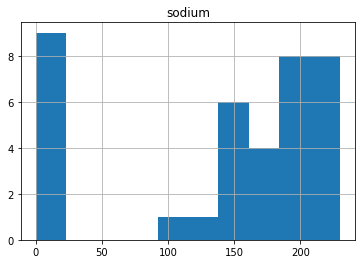

In [12]:
cereal_df = cereal_df.drop([53,16,62,15,72]) # Remove outliers
ax = cereal_df.hist(column='sodium')
cereal_df.sort_values('sodium', ascending=False)

# Recommendation: Rating?

In [13]:
# Assumption: 'rating' must mean something important
# Perhaps it is inversely correlated with 'taste'
# More data and evaluation needed to prove

cereal_df.sort_values('rating', ascending=False)

,name,calories,protein,fat,sodium,fiber,carbo,sugars,vitamins,rating,sugar_cals,fat_cals
3,All-Bran with Extra Fiber,50,4,0,140,14.0,8.0,0,25,93.704912,0,0
64,Shredded Wheat 'n'Bran,90,3,0,0,4.0,19.0,0,0,74.472949,0,0
65,Shredded Wheat spoon size,90,3,0,0,3.0,20.0,0,0,72.801787,0,0
63,Shredded Wheat,80,2,0,0,3.0,16.0,0,0,68.235885,0,0
55,Puffed Wheat,50,2,0,0,1.0,10.0,0,0,63.005645,0,0
54,Puffed Rice,50,1,0,0,0.0,13.0,0,0,60.756112,0,0
50,Nutri-grain Wheat,90,3,0,170,3.0,18.0,2,25,59.642837,8,0
68,Strawberry Fruit Wheats,90,2,0,15,3.0,15.0,5,25,59.363993,20,0
26,Frosted Mini-Wheats,100,3,0,0,3.0,14.0,7,25,58.345141,28,0
60,Raisin Squares,90,2,0,0,2.0,15.0,6,25,55.333142,24,0


In [14]:
rand_cereals = cereal_df.sample(n=4) # grab 4 random samples
rand_cereals = rand_cereals.sort_values('rating', ascending=True).reset_index()

In [15]:
print('TOP 5 BEST Cereals:')
print('#5:',rand_cereals.name[3])
print('#4:',rand_cereals.name[2])
print('#3:',rand_cereals.name[1])
print('#2:',rand_cereals.name[0])
print('#1:',cereal_df.name[12]) # The clear winner

TOP 5 BEST Cereals:
#5: Strawberry Fruit Wheats
#4: Multi-Grain Cheerios
#3: Raisin Nut Bran
#2: Cinnamon Toast Crunch
#1: Cinnamon Toast Crunch
